# Identification of PIP_Temperature trends per press

Use of ECDAT package to extract the TREND, SEASONALITY and RANDOM (or also know as “noise”, “Irregular” or “Remainder) values to isolate the signal. 

## Load Packages

In [1]:
if (!require("Ecdat")) { install.packages("Ecdat", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("tidyr")) { install.packages("tidyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("ggplot2")) { install.packages("ggplot2", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("purrr")) { install.packages("purrr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("forecast")) { install.packages("forecast", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("plyr")) { install.packages("plyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("dplyr")) { install.packages("dplyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("lubridate")) { install.packages("lubridate", lib='/R/library', repos='http://cran.us.r-project.org') }

Loading required package: Ecdat
Loading required package: Ecfun

Attaching package: ‘Ecfun’

The following object is masked from ‘package:base’:

    sign


Attaching package: ‘Ecdat’

The following object is masked from ‘package:datasets’:

    Orange

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: purrr
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 


Attaching package: ‘forecast’

The following object is masked from ‘package:Ecfun’:

    BoxCox

Loading required package: plyr

Attaching package: ‘plyr’

The following object is masked from ‘package:purrr’:

    compact

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    su

## Reading data

In [2]:
load('IndigoData.dat')
glimpse(data)

Observations: 1,211,693
Variables: 22
$ event_RowNumber (dbl) 15765585098, 15765585142, 15765585284, 15765585445,...
$ event_press     (int) 45000586, 45000586, 45000586, 45000586, 45000586, 4...
$ Product_Line    (fctr) HP Indigo 7600, HP Indigo 7600, HP Indigo 7600, HP...
$ series          (fctr) 7000 Family Sheet Fed Commercial Press, 7000 Famil...
$ Region          (fctr) North America, North America, North America, North...
$ SubRegion       (fctr) MidAtlantic United States, MidAtlantic United Stat...
$ District        (fctr) UNITED STATES, UNITED STATES, UNITED STATES, UNITE...
$ Ownership       (fctr) DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DI...
$ event_recNum    (int) 739828, 739878, 740037, 740221, 740224, 740554, 740...
$ event_date      (chr) "2016-06-08 00:00:00.000", "2016-06-08 00:00:00.000...
$ event_time      (int) 74703, 75903, 84709, 93603, 95930, 120644, 132213, ...
$ event_name      (fctr) SAMPLE_PIP_AND_IMO_PARAMETERS, SAMPLE_PIP_AND_IMO_...
$ event_state 

## Counting events per press

Check the list of printers (event_press) with more events.

In [3]:
df <- data %>%
    select(event_press, full_time, PIP_Temperature) %>%
    group_by(event_press) %>%
    summarise(start = min(full_time), end = max(full_time), count = n(), perday = n()/180, perweek = n()/26, permonth = n()/6) %>%
    mutate(avg_evt = mean(count), med_evt = median(count), sd_evt = sd(count)) %>%    
    mutate(med_perday = median(perday), med_perweek = median(perweek), med_permonth = median(permonth)) %>%
    arrange(desc(count))
str(df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	873 obs. of  13 variables:
 $ event_press : int  43000317 40000466 40000147 40000243 40000383 43000220 43000188 43000379 43000334 40000469 ...
 $ start       : POSIXct, format: "2016-01-05 06:52:59" "2016-01-02 07:19:50" ...
 $ end         : POSIXct, format: "2016-06-30 22:46:27" "2016-06-30 23:48:20" ...
 $ count       : int  6100 4579 4307 4083 3960 3851 3835 3599 3423 3422 ...
 $ perday      : num  33.9 25.4 23.9 22.7 22 ...
 $ perweek     : num  235 176 166 157 152 ...
 $ permonth    : num  1017 763 718 680 660 ...
 $ avg_evt     : num  1388 1388 1388 1388 1388 ...
 $ med_evt     : int  1234 1234 1234 1234 1234 1234 1234 1234 1234 1234 ...
 $ sd_evt      : num  751 751 751 751 751 ...
 $ med_perday  : num  6.86 6.86 6.86 6.86 6.86 ...
 $ med_perweek : num  47.5 47.5 47.5 47.5 47.5 ...
 $ med_permonth: num  206 206 206 206 206 ...


## Select printer with many events

Apply filter to get data from the printer with more number of events.

In [4]:
my_data <- data %>%
    filter(event_press == '43000317') %>%
    select(PIP_Temperature, full_time)
head(my_data)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[2]]) result is length 2


  PIP_Temperature           full_time
1             235 2016-04-04 06:54:53
2             274 2016-04-04 07:44:30
3             276 2016-04-04 07:57:59
4             273 2016-04-04 08:27:04
5             283 2016-04-04 08:39:04
6             266 2016-03-03 13:20:48

In [5]:
class(my_data$full_time)

[1] "POSIXct" "POSIXt"

In [6]:
my_data$Var1 <- as.POSIXct(strftime(my_data$full_time, format="%Y-%m-%d"))
head(my_data)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[2]]) result is length 2


  PIP_Temperature           full_time       Var1
1             235 2016-04-04 06:54:53 2016-04-04
2             274 2016-04-04 07:44:30 2016-04-04
3             276 2016-04-04 07:57:59 2016-04-04
4             273 2016-04-04 08:27:04 2016-04-04
5             283 2016-04-04 08:39:04 2016-04-04
6             266 2016-03-03 13:20:48 2016-03-03

In [7]:
freq <- data.frame(table(my_data$Var1))
head(freq)

,Var1,Freq
1,2016-01-05,7
2,2016-01-07,7
3,2016-01-08,6
4,2016-01-11,8
5,2016-01-12,2
6,2016-01-13,5


In [8]:
aggreg <- aggregate(. ~Var1, data=my_data, mean, na.rm=TRUE)
head(aggreg)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[1]]) result is length 2


        Var1 PIP_Temperature  full_time
1 2016-01-05        232.0000 1451984029
2 2016-01-07        242.1429 1452157312
3 2016-01-08        256.1667 1452245533
4 2016-01-11        232.5000 1452509604
5 2016-01-12        256.5000 1452599838
6 2016-01-13        247.8000 1452682701

In [9]:
aggreg$full_time <- NULL
head(aggreg)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[1]]) result is length 2


        Var1 PIP_Temperature
1 2016-01-05        232.0000
2 2016-01-07        242.1429
3 2016-01-08        256.1667
4 2016-01-11        232.5000
5 2016-01-12        256.5000
6 2016-01-13        247.8000

In [10]:
freq$Var1 = as.factor(freq$Var1)
aggreg$Var1 = as.factor(aggreg$Var1)

class(freq$Var1)
class(aggreg$Var1)

[1] "factor"

[1] "factor"

In [11]:
temp <- merge(x = freq, y = aggreg, by = "Var1")
head(temp)

,Var1,Freq,PIP_Temperature
1,2016-01-05,7,232
2,2016-01-07,7,242.142857142857
3,2016-01-08,6,256.166666666667
4,2016-01-11,8,232.5
5,2016-01-12,2,256.5
6,2016-01-13,5,247.8


In [12]:
temp <- temp[order(temp$Var1),]
temp$Var1 <- as.Date(temp$Var1)
temp
glimpse(temp)

,Var1,Freq,PIP_Temperature
1,2016-01-05,7,232
2,2016-01-07,7,242.142857142857
3,2016-01-08,6,256.166666666667
4,2016-01-11,8,232.5
5,2016-01-12,2,256.5
6,2016-01-13,5,247.8
7,2016-01-14,7,253.857142857143
8,2016-01-15,19,259.368421052632
9,2016-01-18,13,256.769230769231
10,2016-01-19,2,240.5


Observations: 143
Variables: 3
$ Var1            (date) 2016-01-05, 2016-01-07, 2016-01-08, 2016-01-11, 20...
$ Freq            (int) 7, 7, 6, 8, 2, 5, 7, 19, 13, 2, 6, 6, 7, 4, 13, 8, ...
$ PIP_Temperature (dbl) 232.0000, 242.1429, 256.1667, 232.5000, 256.5000, 2...


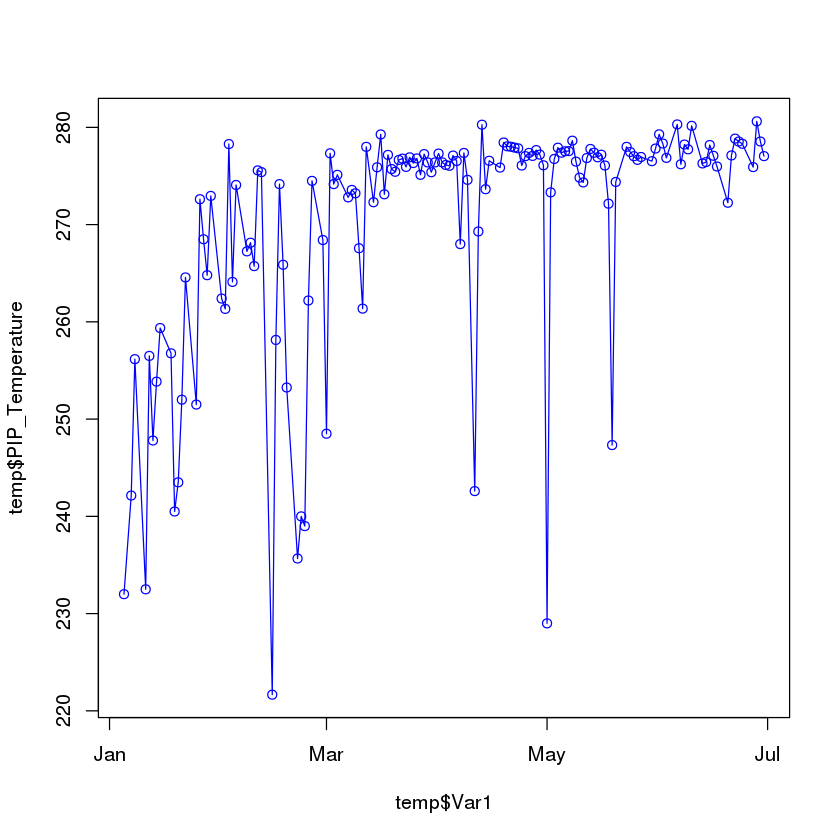

In [13]:
plot(temp$Var1, temp$PIP_Temperature,type='o',col='blue')

# Select data from a specific week

Select a initial date and create a data frame to generate the TREND line based in Linear Regression. 

In [14]:
start_date = as.Date("2016-01-11")
end_date = start_date + days(4)
#lm_temp <- lm(PIP_Temperature ~ Var1, data=temp[temp$Var1>=start_date & temp$Var1<=end_date,]) 
filter_temp <- temp[temp$Var1>=start_date & temp$Var1<=end_date,]
summary(filter_temp)
head(filter_temp)

      Var1                 Freq      PIP_Temperature
 Min.   :2016-01-11   Min.   : 2.0   Min.   :232.5  
 1st Qu.:2016-01-12   1st Qu.: 5.0   1st Qu.:247.8  
 Median :2016-01-13   Median : 7.0   Median :253.9  
 Mean   :2016-01-13   Mean   : 8.2   Mean   :250.0  
 3rd Qu.:2016-01-14   3rd Qu.: 8.0   3rd Qu.:256.5  
 Max.   :2016-01-15   Max.   :19.0   Max.   :259.4  

,Var1,Freq,PIP_Temperature
4,16811.0,8.0,232.5
5,16812.0,2.0,256.5
6,16813.0,5.0,247.8
7,16814.0000,7.0000,253.8571
8,16815.0000,19.0000,259.3684


In [15]:
lm_filter <- lm(PIP_Temperature ~ Var1, data=filter_temp)
summary(lm_filter)


Call:
lm(formula = PIP_Temperature ~ Var1, data = filter_temp)

Residuals:
      4       5       6       7       8 
-7.2863 11.6043 -2.2051 -1.2574 -0.8555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -85654.312  42856.686  -1.999    0.140
Var1             5.109      2.549   2.004    0.139

Residual standard error: 8.061 on 3 degrees of freedom
Multiple R-squared:  0.5725,	Adjusted R-squared:   0.43 
F-statistic: 4.018 on 1 and 3 DF,  p-value: 0.1387


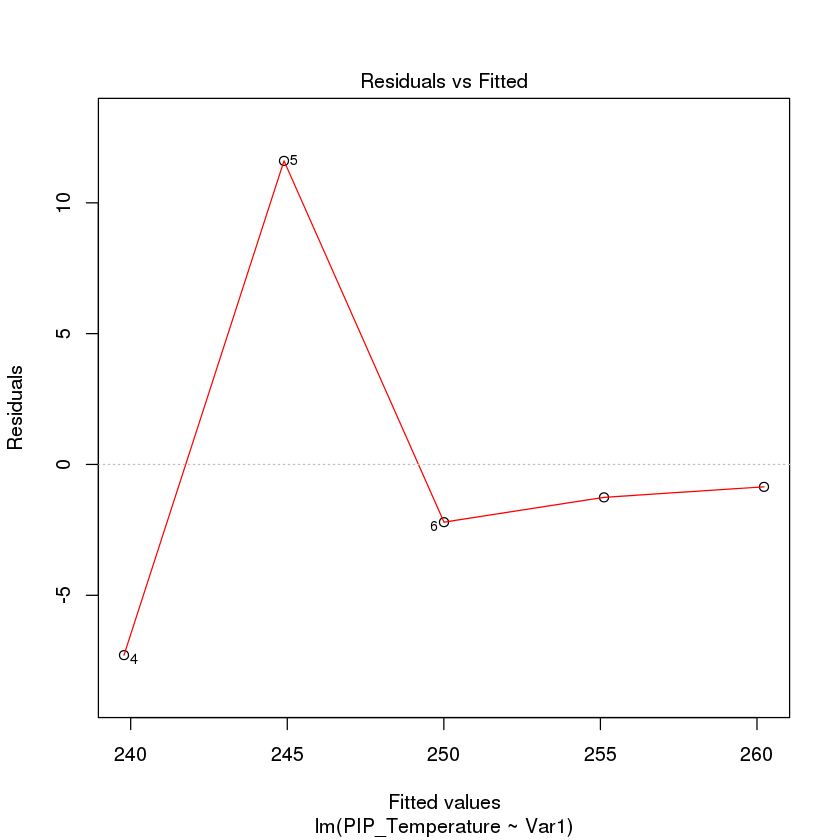

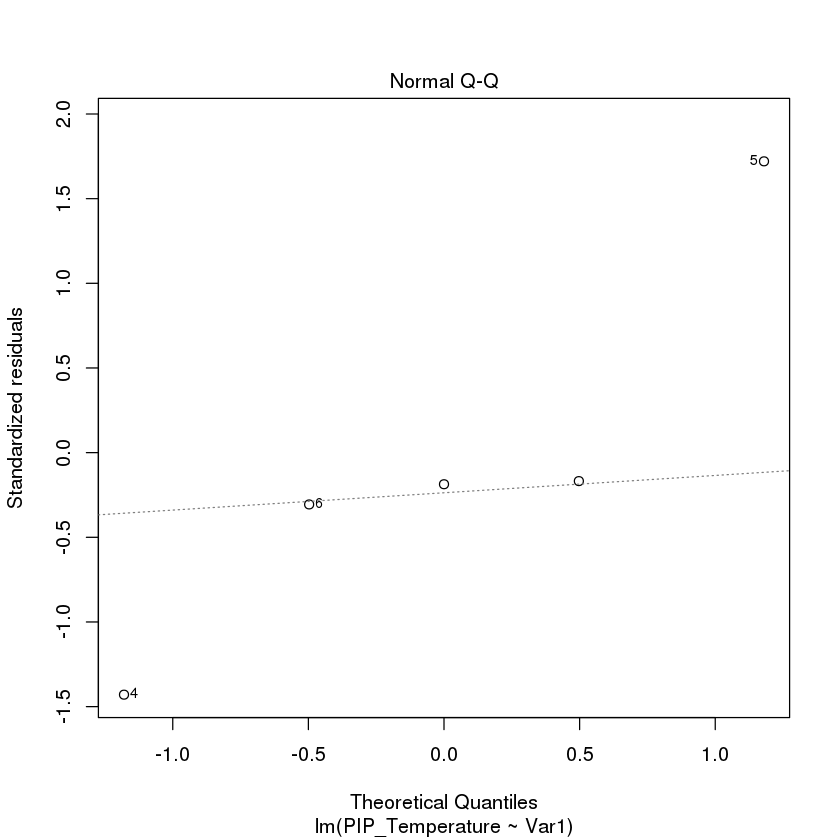

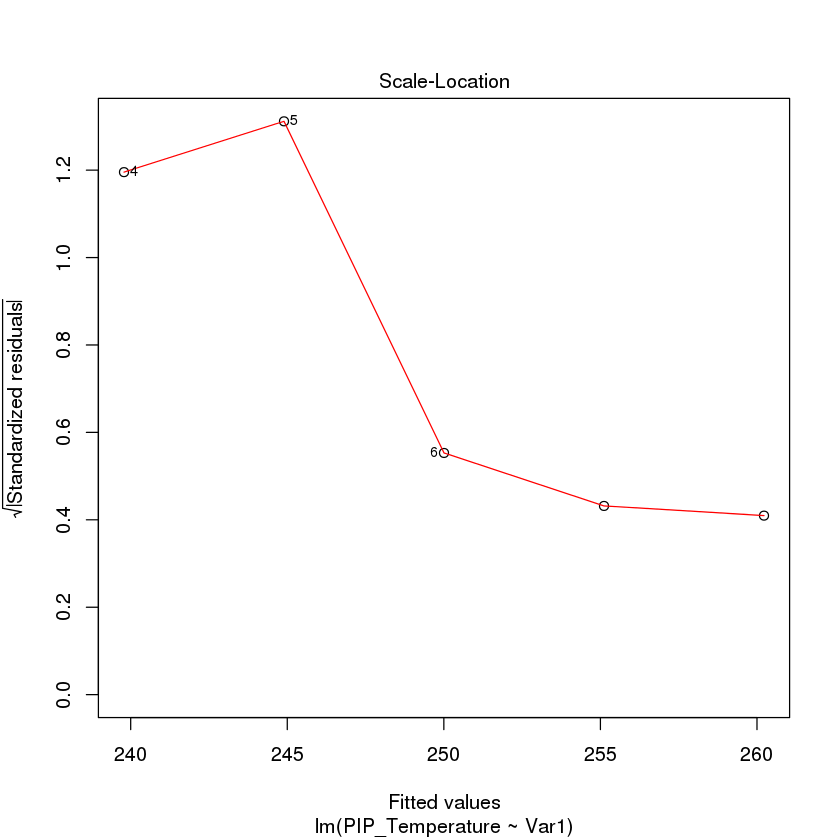

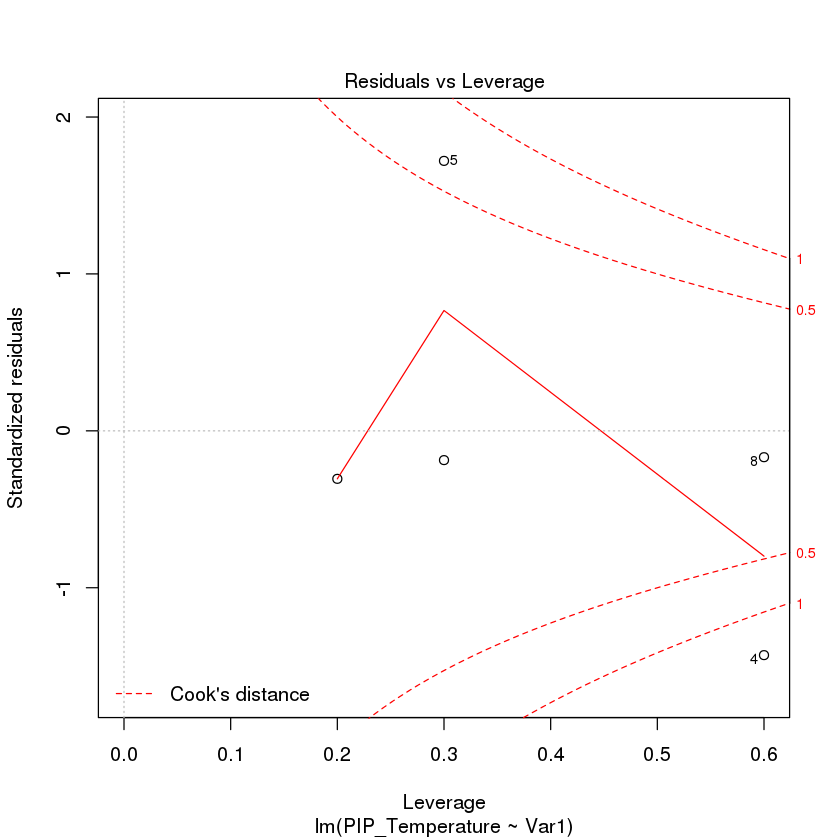

In [16]:
plot(lm_filter)

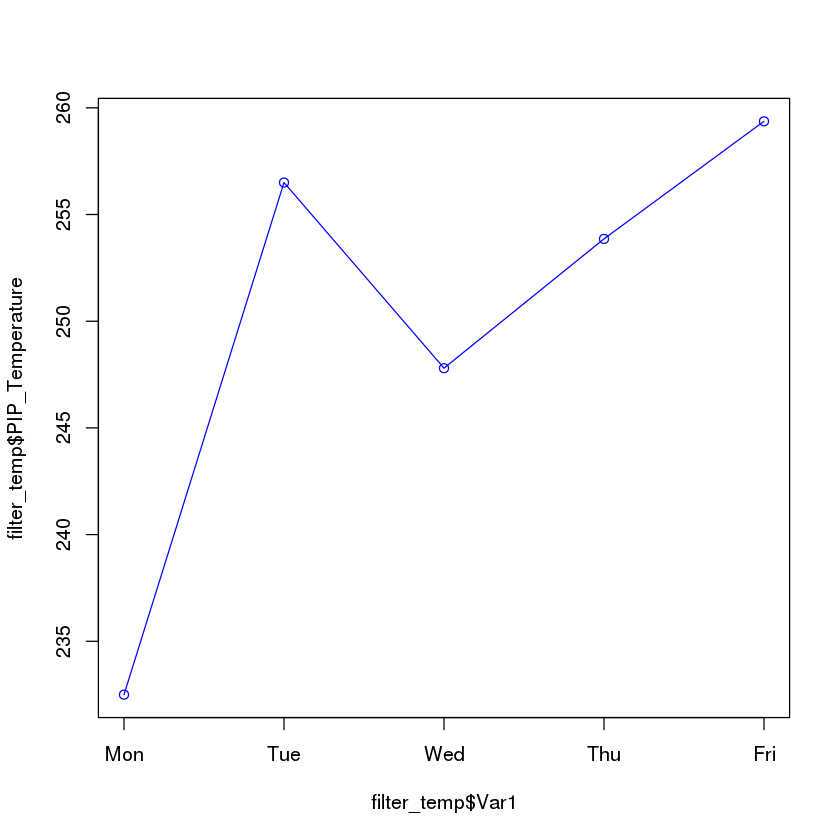

In [17]:
plot(filter_temp$Var1,filter_temp$PIP_Temperature,type='o',col='blue')

# Create the TREND line (Linear Regression) based in the data frame from selected week

Create Linear Regression model based in the data frame created from selected week.

In [18]:
model <- lm(PIP_Temperature ~ Var1, data = filter_temp)
model


Call:
lm(formula = PIP_Temperature ~ Var1, data = filter_temp)

Coefficients:
(Intercept)         Var1  
 -85654.312        5.109  


Plot the data from the selected week and the trend line (based in the Linear Regression).

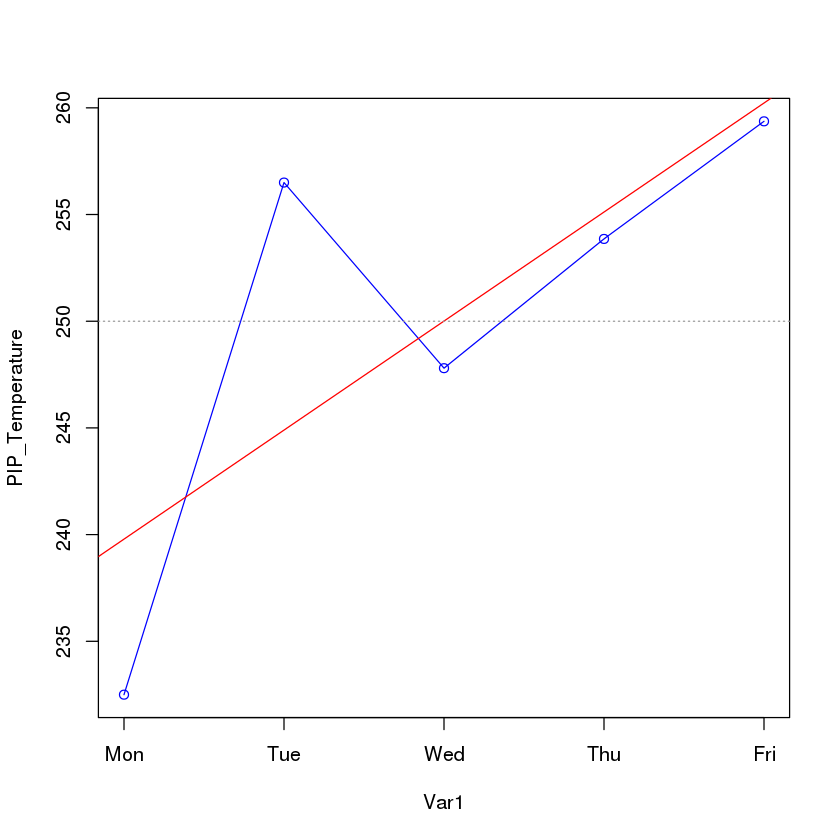

In [19]:
plot(PIP_Temperature ~ Var1, data = filter_temp, type='o',col='blue')
abline(model, col = "red")
abline(h = 250, col = "gray60", lty = 3)

Simple plot of the data frame (not from the selected week) and the trend line measured in the week selected.

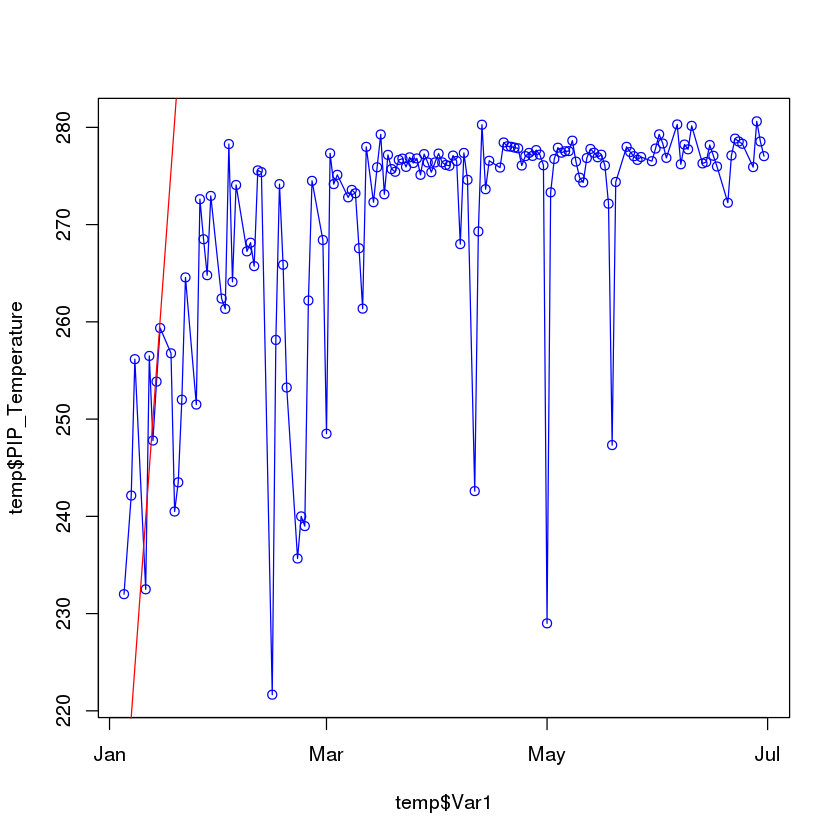

In [20]:
plot(temp$Var1,temp$PIP_Temperature,type='o',col='blue')
abline(model, col = "red")

Simple plot using the GGPLOT2 library adding the global trend (in blue) based in the Linear Regression.

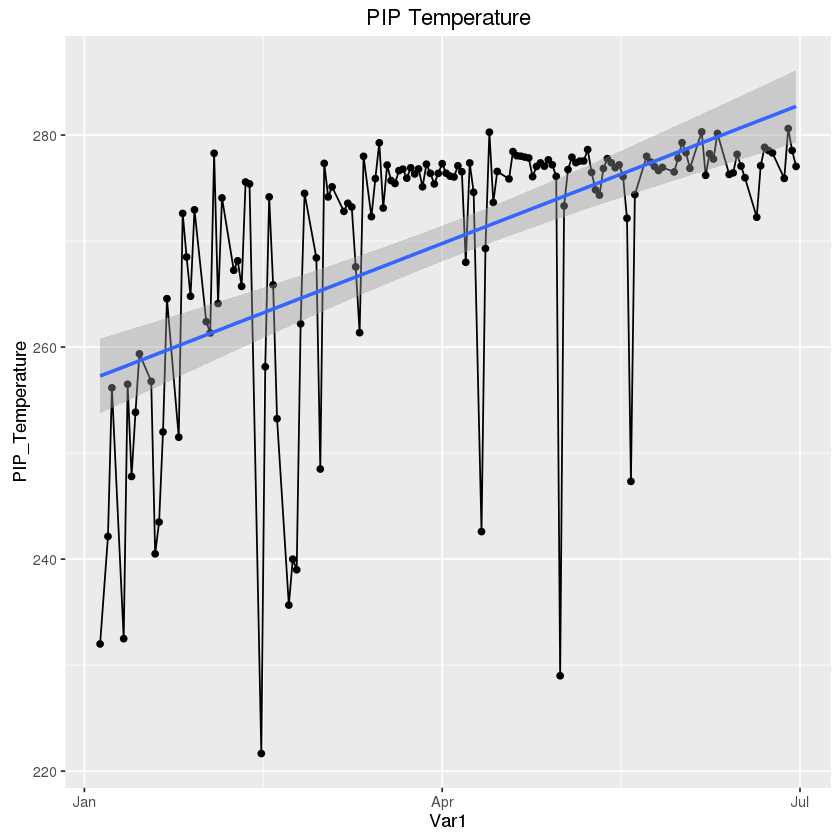

In [21]:
temp %>%
    mutate(Var1 = as.POSIXct(Var1)) %>%
    ggplot(aes(x = Var1, y = PIP_Temperature, group = 1)) +
        labs(x = "Var1", y = "PIP_Temperature", title = "PIP Temperature") +
        geom_point() +
        geom_line() + 
        stat_smooth(method = "lm")

Plot the same data but adding the thresholds (min and max) and the trend line in red.

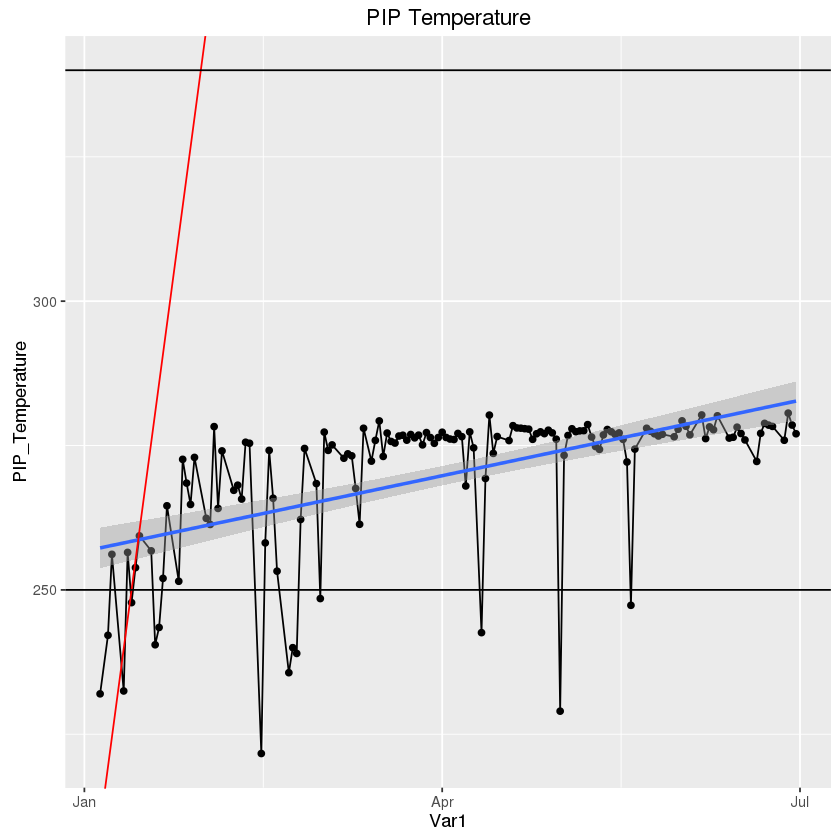

In [22]:
temp %>%
    mutate(Var1 = as.Date(Var1)) %>%
    ggplot(aes(x = Var1, y = PIP_Temperature, group = 1)) +
        labs(x = "Var1", y = "PIP_Temperature", title = "PIP Temperature") +
        geom_point() +
        geom_line() + 
        stat_smooth(method = "lm") +
        geom_abline(colour="red", intercept = coef(model)[1], slope = coef(model)[2]) +
        geom_hline(aes(yintercept = 250)) + 
        geom_hline(aes(yintercept = 340))

# ## ZOOM on the selected week ##

Simple test just to force a ZOOM with COORD_CARTESIAN on the selected week

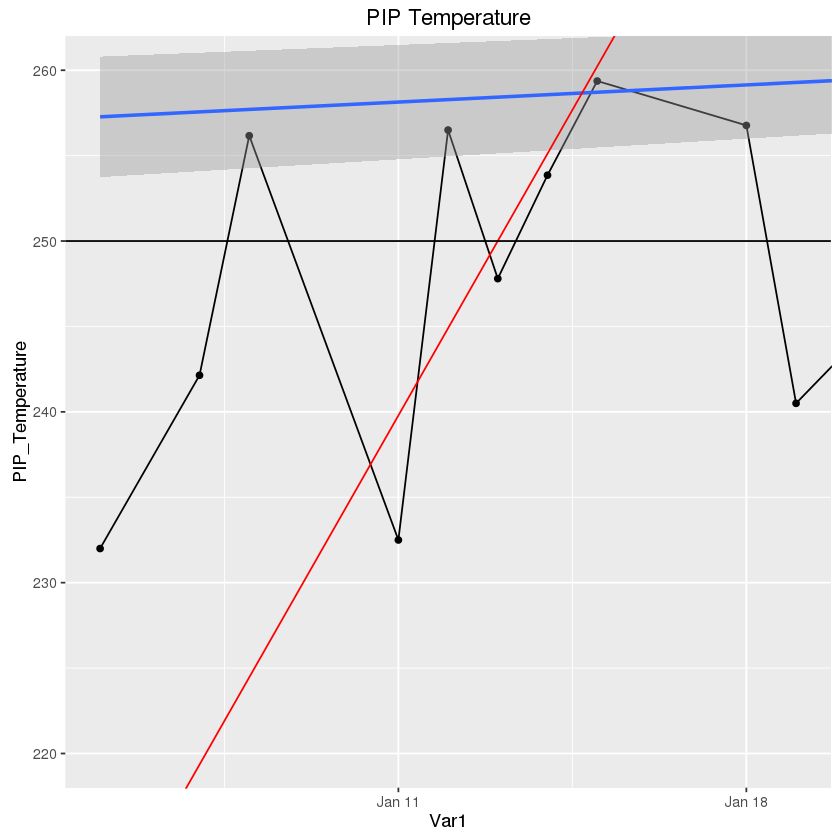

In [23]:
temp %>%
    mutate(Var1 = as.Date(Var1)) %>%
    ggplot(aes(x = Var1, y = PIP_Temperature, group = 1)) +
        labs(x = "Var1", y = "PIP_Temperature", title = "PIP Temperature") +
        geom_point() +
        geom_line() + 
        stat_smooth(method = "lm") +
        geom_abline(colour="red", intercept = coef(model)[1], slope = coef(model)[2]) +
        geom_hline(aes(yintercept = 250)) + 
        geom_hline(aes(yintercept = 340)) + 
        coord_cartesian(xlim=as.Date(c("2016-01-05","2016-01-19")),ylim=c(220, 260)) #+
        #coord_cartesian(xlim=c("2016-01-05","2016-01-14"),ylim=c(220, 260))
        #coord_cartesian(xlim=as.Date(c("2016-01-05","2016-01-14")))

# ## Measure the trend of a second week and plot it  ##

Select a second week and create a data frame based on it.

In [24]:
start_date1 = as.Date("2016-06-13")
end_date1 = start_date1 + days(4)
filter_temp1 <- temp[temp$Var1>=start_date1 & temp$Var1<=end_date1,]
summary(filter_temp1)
head(filter_temp1)

      Var1                 Freq      PIP_Temperature
 Min.   :2016-06-13   Min.   :24.0   Min.   :276.0  
 1st Qu.:2016-06-14   1st Qu.:39.0   1st Qu.:276.3  
 Median :2016-06-15   Median :44.0   Median :276.4  
 Mean   :2016-06-15   Mean   :43.8   Mean   :276.8  
 3rd Qu.:2016-06-16   3rd Qu.:48.0   3rd Qu.:277.1  
 Max.   :2016-06-17   Max.   :64.0   Max.   :278.2  

,Var1,Freq,PIP_Temperature
130,16965.0000,24.0000,276.2917
131,16966.0000,39.0000,276.4359
132,16967.0000,64.0000,278.1875
133,16968.0000,48.0000,277.0833
134,16969.0000,44.0000,275.9773


Create the Linear Regression to create the trend line.

In [25]:
lm_filter1 <- lm(PIP_Temperature ~ Var1, data=filter_temp1)
summary(lm_filter1)


Call:
lm(formula = PIP_Temperature ~ Var1, data = filter_temp1)

Residuals:
    130     131     132     133     134 
-0.4997 -0.3574  1.3924  0.2863 -0.8216 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 2.452e+02  5.430e+03   0.045    0.967
Var1        1.865e-03  3.201e-01   0.006    0.996

Residual standard error: 1.012 on 3 degrees of freedom
Multiple R-squared:  1.132e-05,	Adjusted R-squared:  -0.3333 
F-statistic: 3.395e-05 on 1 and 3 DF,  p-value: 0.9957


Based in the Linear Regression, create the model to plot it easily.

In [26]:
model1 <- lm(PIP_Temperature ~ Var1, data = filter_temp1)
model1


Call:
lm(formula = PIP_Temperature ~ Var1, data = filter_temp1)

Coefficients:
(Intercept)         Var1  
  2.452e+02    1.865e-03  


Simple plot using the GGPLOT2 library to expose the data frame with some information but here was added a line in GREEN of another trend measured of a second week.

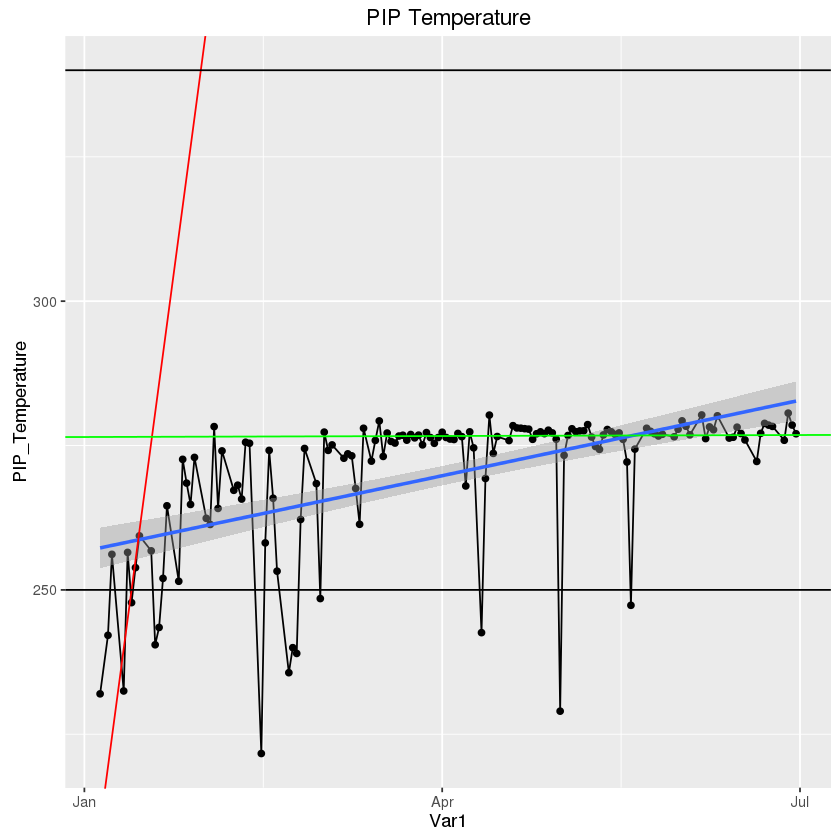

In [27]:
temp %>%
    mutate(Var1 = as.Date(Var1)) %>%
    ggplot(aes(x = Var1, y = PIP_Temperature, group = 1)) +
        labs(x = "Var1", y = "PIP_Temperature", title = "PIP Temperature") +
        geom_point() +
        geom_line() + 
        stat_smooth(method = "lm") +
        geom_abline(colour="red", intercept = coef(model)[1], slope = coef(model)[2]) +
        geom_abline(colour="green", intercept = coef(model1)[1], slope = coef(model1)[2]) +
        geom_hline(aes(yintercept = 250)) + 
        geom_hline(aes(yintercept = 340))

# ## Check the lines intersection and get the respective date ##

Create the "threshold" data based in two points of same y value but with two different x dates (values). With these data, create the Li
After create the threshold model, just a simple plot to check the data frame and the two models (threshold and trend measured).

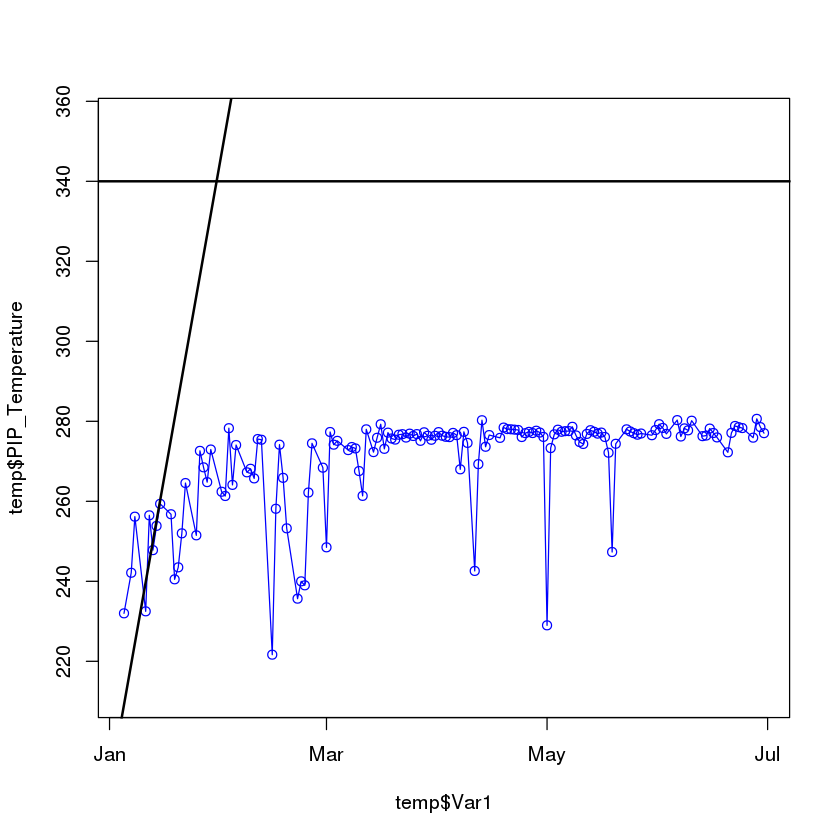

In [28]:
xmod2 <- c("2016-01-11","2016-01-14")
ymod2 <- c(340,340)
mod2 <- lm(ymod2 ~ as.Date(xmod2))
plot(temp$Var1,temp$PIP_Temperature, ylim=c(min(temp$PIP_Temperature)-10, max(ymod2)+15),type='o',col='blue')
abline(mod2, lwd=2)
abline(model, lwd=2)

Check the INTERSECTION between the two models (one is the trend measured and the other is the THRESHOLD)

In [29]:
cm <- rbind(coef(model),coef(mod2))
ponto <- c(-solve(cbind(cm[,2],-1)) %*% cm[,1])
ponto

[1] 16830.61   340.00

Simple plot of the data frame, the threshold line, the measured trend line and the intersection point.

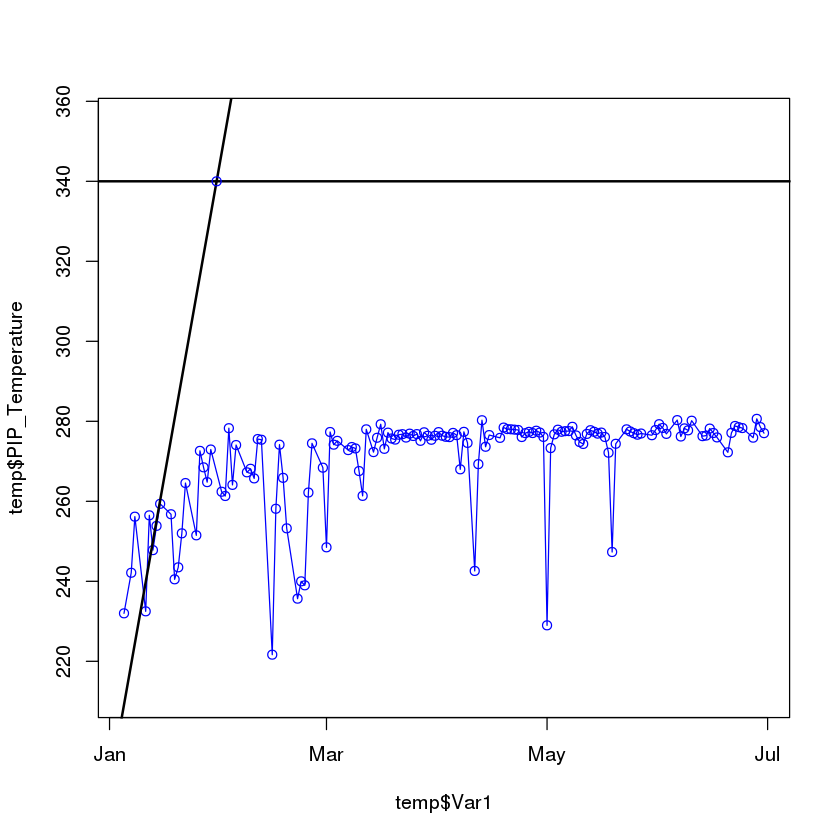

In [30]:
plot(temp$Var1,temp$PIP_Temperature, ylim=c(min(temp$PIP_Temperature)-10, max(ymod2)+15),type='o',col='blue')
abline(mod2, lwd=2)
abline(model, lwd=2)
points(ponto[1],ponto[2],col='blue')

Show the intersection point as data

In [31]:
as.Date.numeric(ponto[1], origin = "1970-01-01")

[1] "2016-01-30"

In [71]:
linear_estimation <- as.Date.numeric(ponto[1], origin = "1970-01-01")
suported_estimation_window <- 30
linear_estimation <= end_date + suported_estimation_window

[1] TRUE

Generate a plot with the data frame, the threshold lines (min and max), the global trend in blue, the trend of a specific week and the intersection point in blue.

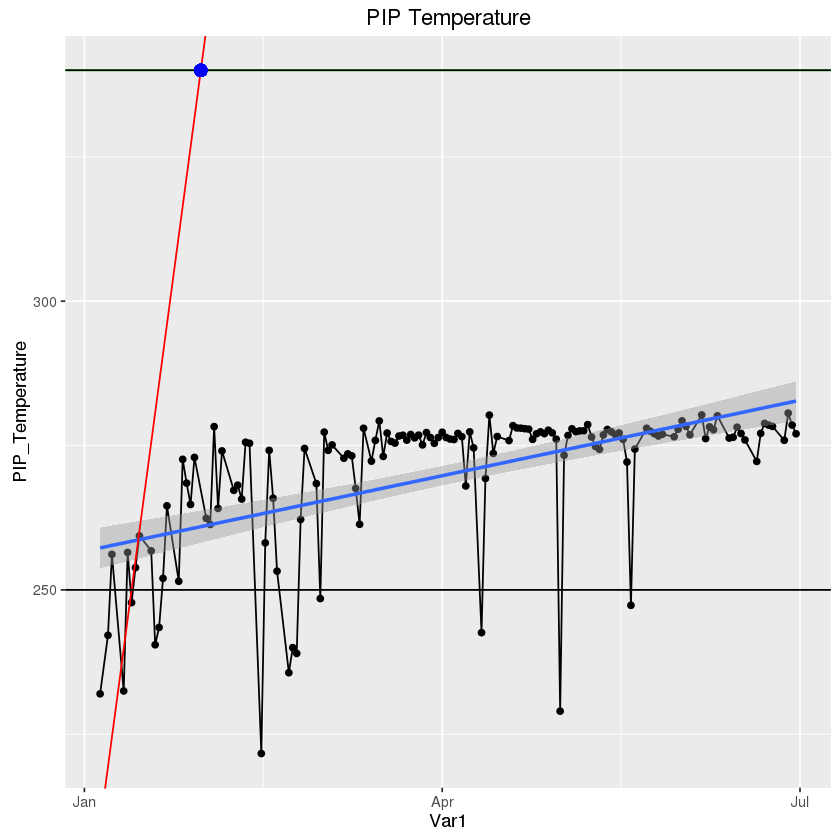

In [32]:
temp %>%
    mutate(Var1 = as.Date(Var1)) %>%
    ggplot(aes(x = Var1, y = PIP_Temperature, group = 1)) +
        labs(x = "Var1", y = "PIP_Temperature", title = "PIP Temperature") +
        geom_point() +
        geom_line() + 
        stat_smooth(method = "lm") +
        geom_abline(colour="red", intercept = coef(model)[1], slope = coef(model)[2]) +
        geom_abline(colour="green", intercept = coef(mod2)[1], slope = coef(mod2)[2]) +
        geom_hline(aes(yintercept = 250)) + 
        geom_hline(aes(yintercept = 340)) +
        geom_point(x=ponto[1], y=ponto[2], size=3, colour="blue")

# Try to create a line based in the linear regression

In [33]:
filter_temp

,Var1,Freq,PIP_Temperature
4,16811.0,8.0,232.5
5,16812.0,2.0,256.5
6,16813.0,5.0,247.8
7,16814.0000,7.0000,253.8571
8,16815.0000,19.0000,259.3684


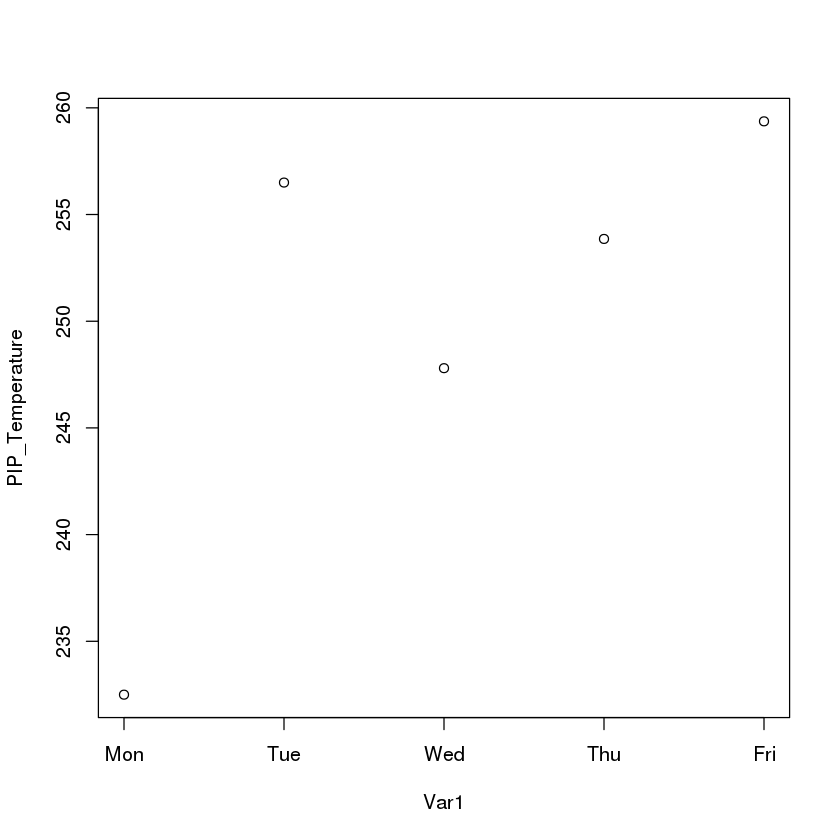

In [34]:
plot(PIP_Temperature~Var1, filter_temp)

In [35]:
model


Call:
lm(formula = PIP_Temperature ~ Var1, data = filter_temp)

Coefficients:
(Intercept)         Var1  
 -85654.312        5.109  


In [36]:
nx<-c(as.Date("2016-01-11"),as.Date("2016-01-15"))
ny<-predict(model, newdata=data.frame(Var1=nx))

In [37]:
nx
ny

[1] "2016-01-11" "2016-01-15"

1        2 
239.7863 260.2239

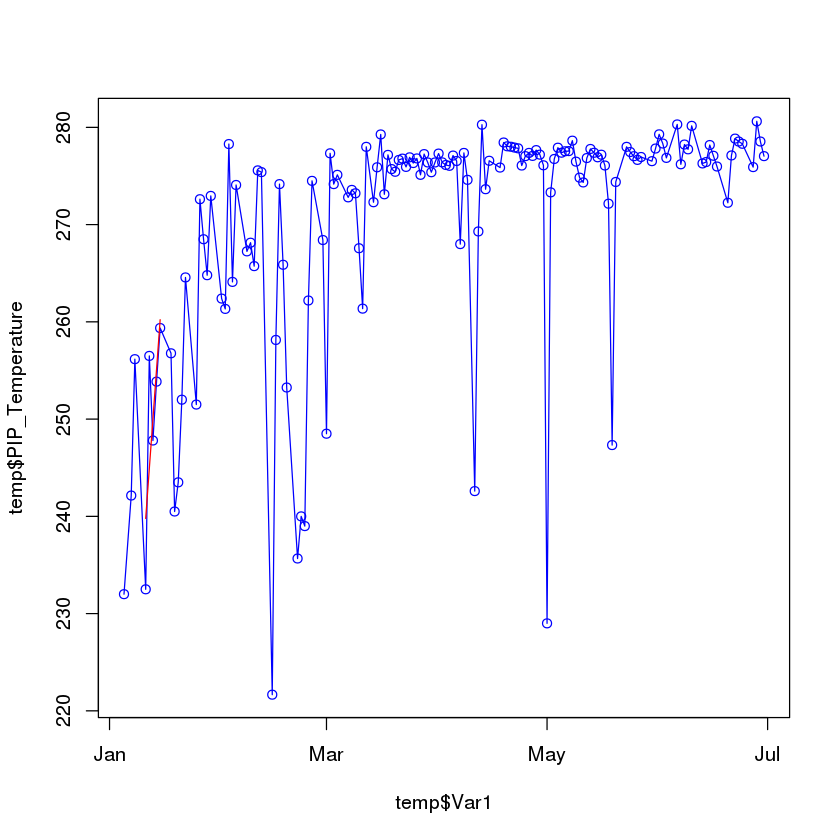

In [38]:
plot(temp$Var1,temp$PIP_Temperature, type='o',col='blue')
lines(nx, ny, col="red")

In [39]:
dado <- data.frame(nx, ny)
dado

,nx,ny
1,16811.0000,239.7863
2,16815.0000,260.2239


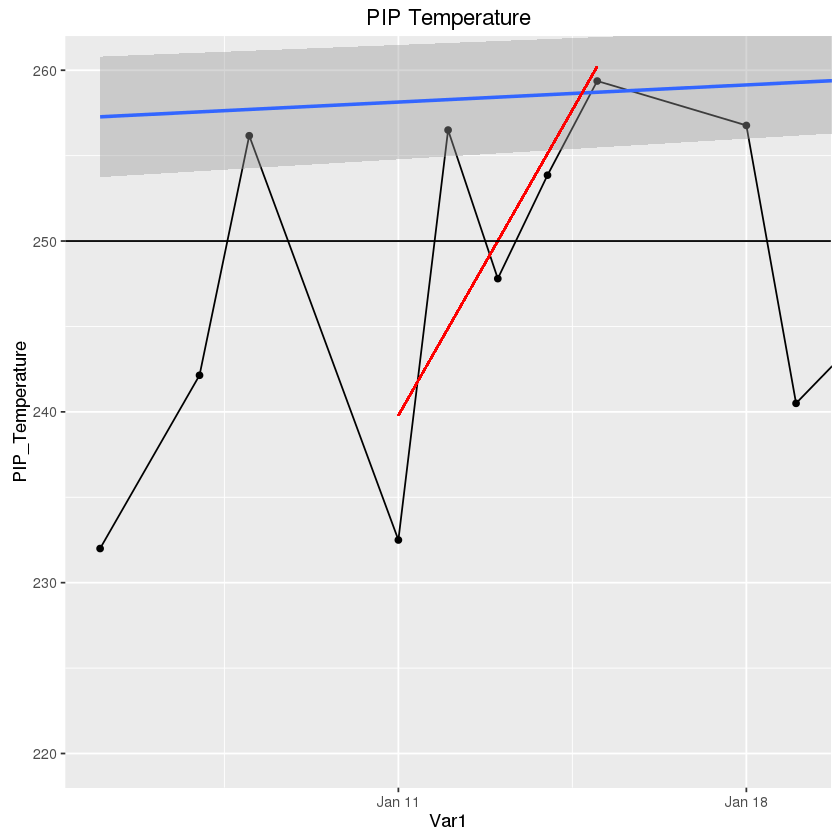

In [40]:
temp %>%
    mutate(Var1 = as.Date(Var1)) %>%
    ggplot(aes(x = Var1, y = PIP_Temperature, group = 1)) +
        labs(x = "Var1", y = "PIP_Temperature", title = "PIP Temperature") +
        geom_point() +
        geom_line() + 
        stat_smooth(method = "lm") +
        geom_segment(aes(x=dado$nx[1],y=dado$ny[1], xend=dado$nx[2],yend=dado$ny[2]),colour="red") +
        geom_hline(aes(yintercept = 250)) + 
        geom_hline(aes(yintercept = 340)) + 
        coord_cartesian(xlim=as.Date(c("2016-01-05","2016-01-19")),ylim=c(220, 260))

# ## Slide Window

In [41]:
temp

,Var1,Freq,PIP_Temperature
1,2016-01-05,7,232
2,2016-01-07,7,242.142857142857
3,2016-01-08,6,256.166666666667
4,2016-01-11,8,232.5
5,2016-01-12,2,256.5
6,2016-01-13,5,247.8
7,2016-01-14,7,253.857142857143
8,2016-01-15,19,259.368421052632
9,2016-01-18,13,256.769230769231
10,2016-01-19,2,240.5


In [42]:
#rollapply(temp, width = 1,
#        function(x) coef(PIP_Temperature+freq)),
#        by.column = FALSE, align = "right")

In [43]:
class(temp$Var1)

[1] "Date"

# Angle of the linear regression

In [44]:
model


Call:
lm(formula = PIP_Temperature ~ Var1, data = filter_temp)

Coefficients:
(Intercept)         Var1  
 -85654.312        5.109  


In [63]:
slope <- summary(model)$coefficients[2,1]

In [64]:
atan(slope) * 180 / pi

[1] 78.92618

## Conclusion:

In this notebook shows that: 
